In [ ]:
# Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Defining the dataset path
import os
dataset_path = '/content/drive/MyDrive/Dataset'
os.listdir(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ALL', 'Healthy', 'MM', 'CML', 'AML', 'CLL']

In [ ]:
# Importing necessary libraries for preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import necessary libraries for preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set image size and batch size according to model input requirements
IMG_SIZE = (224, 224)  # Adjust based on your model's needs
BATCH_SIZE = 16

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to range [0, 1]
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    validation_split=0.2       # Reserve 20% of data for validation set
)
# For validation data, we only rescale without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)



Found 1920 images belonging to 6 classes.


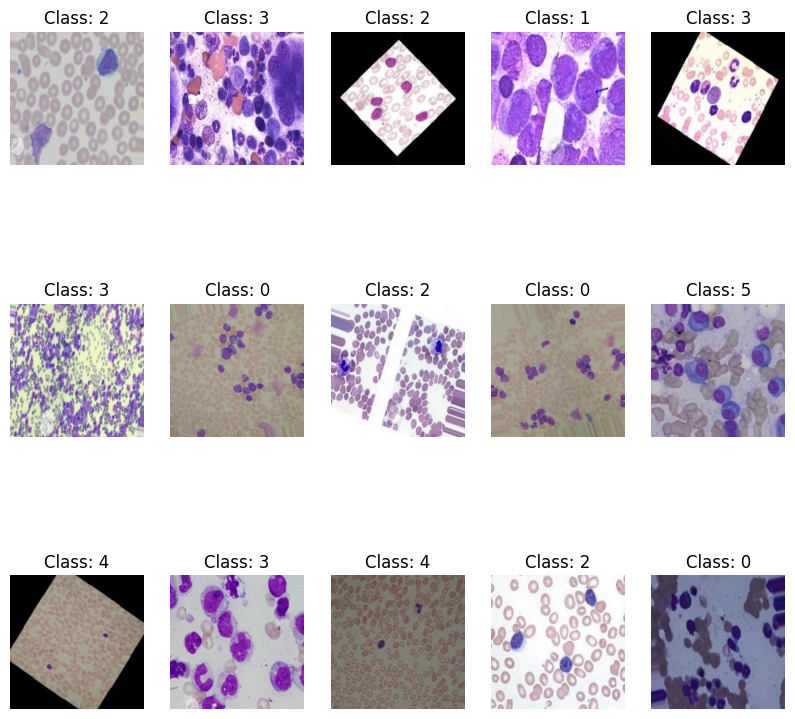

In [ ]:
# Creating a train generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE, # Resizing images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Multi-class classification
    subset='training' # Specified that this is the training data
)

# Visualization of a few preprocessed images from the training set
example_batch = next(train_generator)  # Grabs one batch of data
images, labels = example_batch  # Unpacked the images and labels

# Displaying 5 images with their corresponding class labels
plt.figure(figsize=(10,10))

for i in range(15):  # Displaying the first 15 images
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}') # Displaying the class label
    plt.axis('off')

plt.show()


In [ ]:
# Loading training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE, # Resize of the images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Multi-class classification
    subset='training' # Specified that this is the training data
)

# Loading validation data
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE, # Resize of images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Multi-class classification
    subset='validation' # Specified that this is the validation data
)

# loading the test data similarly, if needed
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE, # Resized to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Multi-class classification
    shuffle=False # No shuffling for test data
)


Found 1920 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.


In [ ]:
# Defining the path to your dataset
dataset_path = '/content/drive/MyDrive/Dataset'

# Creation of the train generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)


Found 1920 images belonging to 6 classes.


In [ ]:
# Importing necessary libraries for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Defining the CNN model architecture
def create_cnn_model(input_shape=(224, 224, 3), num_classes=6):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the feature maps
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # Output layer with softmax activation

    return model

# Creation of the CNN model
cnn_model = create_cnn_model()

# Compilation of the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# Printing the model summary
cnn_model.summary()

# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 875s 7s/step - accuracy: 0.2091 - loss: 2.0491 - val_accuracy: 0.3917 - val_loss: 1.5508
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.3273 - loss: 1.5918 - val_accuracy: 0.3354 - val_loss: 1.4235
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.4055 - loss: 1.3627 - val_accuracy: 0.4896 - val_loss: 1.1114
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - accuracy: 0.4981 - loss: 1.1385 - val_accuracy: 0.5063 - val_loss: 0.9661
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.4996 - loss: 1.0494 - val_accuracy: 0.5229 - val_loss: 0.8790
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5290 - loss: 1.0049 - val_accuracy: 0.6083 - val_loss: 0.7686
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.5898 - loss: 0.8942 - val_accuracy: 0.5437 - val_loss: 0.7957
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - accuracy: 0.5610 - loss: 0.9

In [ ]:
# Importing necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Loading the VGG16 model without the top layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the convolutional base to prevent it from being trained
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x) #addition of a custom layer with 256 units
x = Dense(6, activation='softmax')(x) # output layer for 6 classes

# Creating the model
vgg_model = Model(inputs=base_model.input, outputs=x)


# Compiling the model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001), #using a small learning rate
                  loss='categorical_crossentropy', # Loss function for multiclass classifiocation
                  metrics=['accuracy']) # metric to monitor during training

# displaying the model summary
vgg_model.summary()

# Training the model using training generator and validation generator
vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 47s 302ms/step - accuracy: 0.4576 - loss: 1.3334 - val_accuracy: 0.5833 - val_loss: 0.9705
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 70s 283ms/step - accuracy: 0.7272 - loss: 0.7241 - val_accuracy: 0.6104 - val_loss: 0.9543
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 291ms/step - accuracy: 0.7860 - loss: 0.5820 - val_accuracy: 0.6438 - val_loss: 1.0785
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - accuracy: 0.8023 - loss: 0.5271 - val_accuracy: 0.6208 - val_loss: 0.9448
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - accuracy: 0.8509 - loss: 0.4311 - val_accuracy: 0.6229 - val_loss: 1.0025
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - accuracy: 0.8886 - loss: 0.3479 - val_accuracy: 0.6479 - val_loss: 0.8398
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 284ms/step - accuracy: 0.8675 - loss: 0.3739 - val_accuracy: 0.6583 - val_loss: 0.8889
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 286ms/step - accuracy: 0.8914 - loss: 0

In [ ]:
# Importing necessary libraries
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Loading the MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the convolutional base to prevent it from being trained
for layer in base_model.layers:
    layer.trainable = False

#adding custom layers n top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling reduces the output of the last layer
x = Dense(128, activation='relu')(x) # Adding a dense layer with 128 units
x = Dense(6, activation='softmax')(x) # Output layer for 6 classes

# Creating the model
mobilenet_model = Model(inputs=base_model.input, outputs=x)

# Compiling the model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), # Using a small learning rate
                        loss='categorical_crossentropy', # Loss function for multi-class classification
                        metrics=['accuracy']) # Metric to monitor during training

# Displaying the model summary
mobilenet_model.summary()

# Training the model using the train generator and validation generator
mobilenet_history = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10  # can be increased the number of epochs if needed
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 273ms/step - accuracy: 0.3775 - loss: 1.5953 - val_accuracy: 0.5792 - val_loss: 1.1719
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 265ms/step - accuracy: 0.6362 - loss: 0.9865 - val_accuracy: 0.6396 - val_loss: 0.9899
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.7327 - loss: 0.7807 - val_accuracy: 0.6562 - val_loss: 0.9151
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.7605 - loss: 0.6874 - val_accuracy: 0.6646 - val_loss: 0.8705
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.7921 - loss: 0.6136 - val_accuracy: 0.6604 - val_loss: 0.8530
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 29s 245ms/step - accuracy: 0.8130 - loss: 0.5586 - val_accuracy: 0.6646 - val_loss: 0.8330
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 253ms/step - accuracy: 0.8347 - loss: 0.5080 - val_accuracy: 0.6812 - val_loss: 0.8275
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8561 - loss: 0

In [ ]:
# Importing necessary libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding dropout to existing model
# Example for adding dropout to MobileNetV2:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x) #Dropout layer added here with a 50% dropout rate
x = Dense(6, activation='softmax')(x)

# Creating the updated MobileNetV2 model with dropout
mobilenet_model_with_dropout = Model(inputs=base_model.input, outputs=x)

# Compiling the model
mobilenet_model_with_dropout.compile(optimizer=Adam(learning_rate=0.0001),
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

# Early Stopping callback to monitor validation loss and stop training if it doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data Augmentation (to the training data to prevent overfitting)
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Splitting into training and validation sets
)

# Re-creating the train and validation generators with augmented data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  #training subset with augmentation
)

validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'# Validation subset
)

# Training the model with dropout, Data Augmentation, and Early Stopping
mobilenet_history_with_dropout = mobilenet_model_with_dropout.fit(
    train_generator_augmented,
    steps_per_epoch=train_generator_augmented.samples // BATCH_SIZE,
    validation_data=validation_generator_augmented,
    validation_steps=validation_generator_augmented.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[early_stopping]  # Early stopping to monitor validation loss
)

Found 1920 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 326ms/step - accuracy: 0.2178 - loss: 1.9997 - val_accuracy: 0.5250 - val_loss: 1.4044
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 291ms/step - accuracy: 0.4480 - loss: 1.4158 - val_accuracy: 0.5458 - val_loss: 1.2470
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.5345 - loss: 1.2050 - val_accuracy: 0.5333 - val_loss: 1.1337
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - accuracy: 0.6163 - loss: 1.0479 - val_accuracy: 0.5729 - val_loss: 1.0527
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.6059 - loss: 1.0229 - val_accuracy: 0.5750 - val_loss: 0.9983
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.6379 - loss: 0.9314 - val_accuracy: 0.6292 - val_loss: 0.9567
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - accuracy: 0.6757 - loss: 0.8653 - val_accuracy: 0.6083 - val_loss: 0.9572


In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Data Augmentation (to the training data to prevent overfitting)
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Importing ImageDataGenerator
import os # Importing the 'os' module

# Defining the dataset path
dataset_path = '/content/drive/MyDrive/Dataset'

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting into training and validation sets
)

# Recreating the train and validation generators with augmented data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # Training subset with augmentation
)

validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Validation subset
)

Found 1920 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [ ]:
# Importing necessary libraries for hyperparameter tuning
import keras_tuner as kt

# Defining a function to build the model (for tuning)
def build_model(hp):
    model = Sequential()

    # Adding convolutional layers with hyperparameter tuning
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=8, max_value=64, step=8),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=8, max_value=64, step=8),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Adding dense layers with hyperparameter tuning
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        activation='relu'
    ))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(6, activation='softmax'))

    # Compilation of the model with a tunable learning rate
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initializing Keras Tuner for hyperparameter search
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy', # Tuning based on validation accuracy
    max_epochs=10,
    hyperband_iterations=2,
    directory='keras_tuner_dir',
    project_name='cnn_hyperparameter_tuning'
)

# Displaying a search space summary
tuner.search_space_summary()

# Executing the search
tuner.search(train_generator_augmented, epochs=10, validation_data=validation_generator_augmented)

# obtaining the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

# Displaying a summary of the best model
best_model.summary()

Trial 60 Complete [00h 06m 35s]
val_accuracy: 0.6499999761581421

Best val_accuracy So Far: 0.65625
Total elapsed time: 02h 37m 47s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,752,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,761,366 (21.98 MB)

 Trainable params: 5,761,366 (21.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Evaluation of the tuned MobileNetV2 model on the test set
test_loss, test_accuracy = mobilenet_model_with_dropout.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.7386 - loss: 0.7905
Test Accuracy: 75.83%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prediction on the test set
y_pred = mobilenet_model_with_dropout.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) # Converting predictions to class indices
y_true = test_generator.classes #True class labels from the test set

# Generating classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Generating confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step
Classification Report:
              precision    recall  f1-score   support

         ALL       0.77      0.92      0.84       400
         AML       0.58      0.51      0.54       400
         CLL       0.64      0.62      0.63       400
         CML       0.62      0.55      0.58       400
     Healthy       0.93      0.97      0.95       400
          MM       0.94      0.99      0.96       400

    accuracy                           0.76      2400
   macro avg       0.75      0.76      0.75      2400
weighted avg       0.75      0.76      0.75      2400

Confusion Matrix:
[[367   8  12   6   4   3]
 [ 36 203  79  72   2   8]
 [ 28  55 248  51   6  12]
 [ 35  82  44 220  15   4]
 [  9   0   4   0 387   0]
 [  1   0   0   4   0 395]]


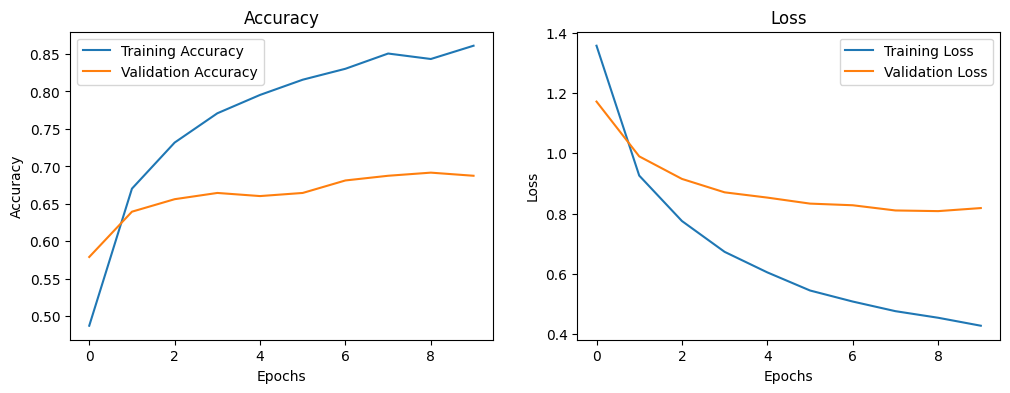

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Training Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

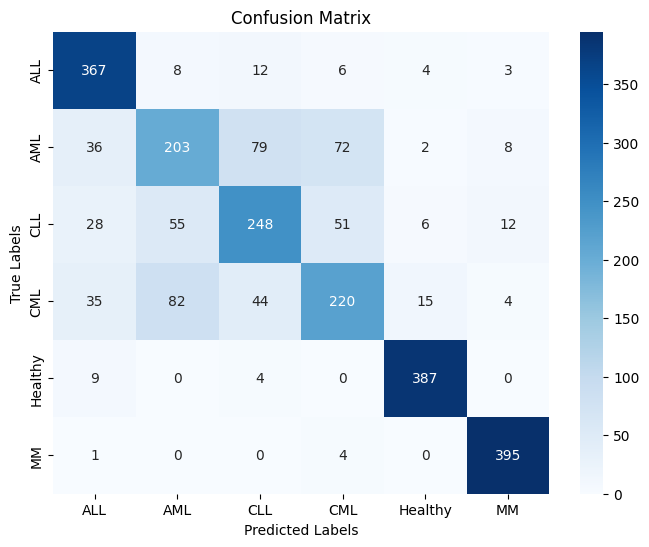

In [ ]:
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()